* load and display first 5 rows


In [3]:

import pandas as pd
dataset = pd.read_csv('Dataset_of100_products.csv')
print(dataset.head())

   OrderID          Product     Category  Quantity  PriceEach   OrderDate  \
0        1  Apple iPhone 13  Electronics         1     999.99  2025-04-01   
1        2  MacBook Pro 16"  Electronics         1    2499.99  2025-04-01   
2        3   Wireless Mouse  Accessories         2      29.99  2025-04-01   
3        4      AirPods Pro  Accessories         1     249.99  2025-04-02   
4        5        LG 55" TV  Electronics         1     799.99  2025-04-02   

            City CustomerID  
0       New York   CUST1001  
1  San Francisco   CUST1002  
2        Chicago   CUST1003  
3    Los Angeles   CUST1004  
4          Miami   CUST1005  


In [4]:
print(dataset.dtypes)
print(dataset.columns)

OrderID         int64
Product        object
Category       object
Quantity        int64
PriceEach     float64
OrderDate      object
City           object
CustomerID     object
dtype: object
Index(['OrderID', 'Product', 'Category', 'Quantity', 'PriceEach', 'OrderDate',
       'City', 'CustomerID'],
      dtype='object')


In [5]:
#converting data types
df=dataset.convert_dtypes()
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
print(df.dtypes)

OrderID                Int64
Product       string[python]
Category      string[python]
Quantity               Int64
PriceEach            Float64
OrderDate     datetime64[ns]
City          string[python]
CustomerID    string[python]
dtype: object


In [6]:
#checking for missing values
print(df.isnull().sum())

OrderID       0
Product       0
Category      0
Quantity      0
PriceEach     0
OrderDate     0
City          0
CustomerID    0
dtype: int64


In [7]:
# creating a new column
df['TotalPrice'] = df['Quantity'] * df['PriceEach']
print(df.head())

   OrderID          Product     Category  Quantity  PriceEach  OrderDate  \
0        1  Apple iPhone 13  Electronics         1     999.99 2025-04-01   
1        2  MacBook Pro 16"  Electronics         1    2499.99 2025-04-01   
2        3   Wireless Mouse  Accessories         2      29.99 2025-04-01   
3        4      AirPods Pro  Accessories         1     249.99 2025-04-02   
4        5        LG 55" TV  Electronics         1     799.99 2025-04-02   

            City CustomerID  TotalPrice  
0       New York   CUST1001      999.99  
1  San Francisco   CUST1002     2499.99  
2        Chicago   CUST1003       59.98  
3    Los Angeles   CUST1004      249.99  
4          Miami   CUST1005      799.99  


SALES ANALYSIS


* Calculate the total revenue generated by the city.






In [8]:
df['TotalPrice'] = df['Quantity'] * df['PriceEach']
total_revenue = df.groupby('City')['TotalPrice'].sum()
print('Total Revenue Generated by City \n',total_revenue)

Total Revenue Generated by City 
 City
Atlanta           149.97
Austin           1949.92
Boston           3548.94
Chicago          8249.87
Dallas           4599.93
Denver           1299.98
Houston           459.96
Los Angeles      5769.91
Miami            7499.86
New York          7219.9
Portland         2719.88
San Diego        4389.92
San Francisco    6249.88
Seattle          3729.91
Name: TotalPrice, dtype: Float64




*   Identify the top 5 products based on total sales revenue.



In [9]:
df['TotalPrice'] = df['Quantity'] * df['PriceEach']
top_products = df.groupby('Product')['TotalPrice'].sum().nlargest(5)
print('Top 5 products \n',top_products)

Top 5 products 
 Product
Samsung 75" QLED TV    2999.99
Canon EOS 5D Camera    2499.99
MacBook Pro 16"        2499.99
Apple MacBook Pro      2399.99
Apple iMac             1799.99
Name: TotalPrice, dtype: Float64



*  Find the month with the highest sales and plot a graph to show monthly revenue



Monthly Revenue 
 Month
4    33759.23
Name: TotalPrice, dtype: Float64


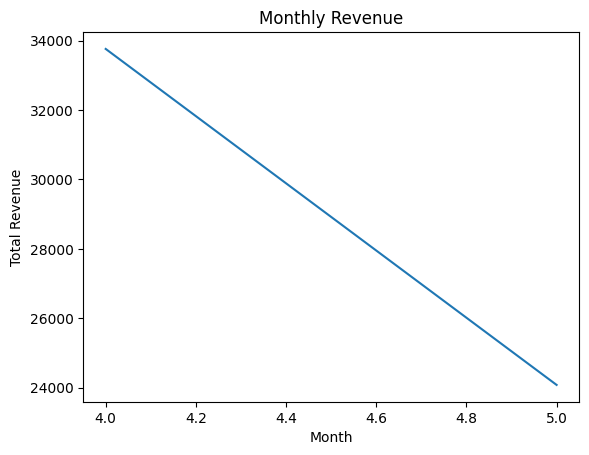

In [10]:
df['Month'] = df['OrderDate'].dt.month
monthly_revenue = df.groupby('Month')['TotalPrice'].sum().nlargest(1)
Monthly_revenue = df.groupby('Month')['TotalPrice'].sum()
print('Monthly Revenue \n',monthly_revenue)
import matplotlib.pyplot as plt
plt.plot(Monthly_revenue.index, Monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue')
plt.show()



* Group the data by Category and calculate the total revenue for each category.



In [11]:
category_revenue = df.groupby('Category')['TotalPrice'].sum()
print('Categorywise Revenue \n',category_revenue)

Categorywise Revenue 
 Category
Accessories          3618.82
Appliances           1579.92
Clothing             1509.81
Electronics         39029.53
Health & Fitness     1779.84
Laptops              3199.97
Photography          7049.95
Tools                  69.99
Name: TotalPrice, dtype: Float64




* Find the city with the highest number of orders.




In [12]:
city_orders = df['City'].value_counts()
print('total orders in each city \n',city_orders)
highest_order_city_ = df['City'].value_counts().nlargest(1)
print('City with highest number of orders \n',highest_order_city_)


total orders in each city 
 City
Chicago          12
Portland         11
Miami            10
San Francisco    10
Los Angeles       8
New York          8
Seattle           8
Dallas            7
San Diego         7
Austin            7
Boston            6
Houston           3
Denver            2
Atlanta           1
Name: count, dtype: Int64
City with highest number of orders 
 City
Chicago    12
Name: count, dtype: Int64


*  Plot a bar chart to visualize revenue across different cities.

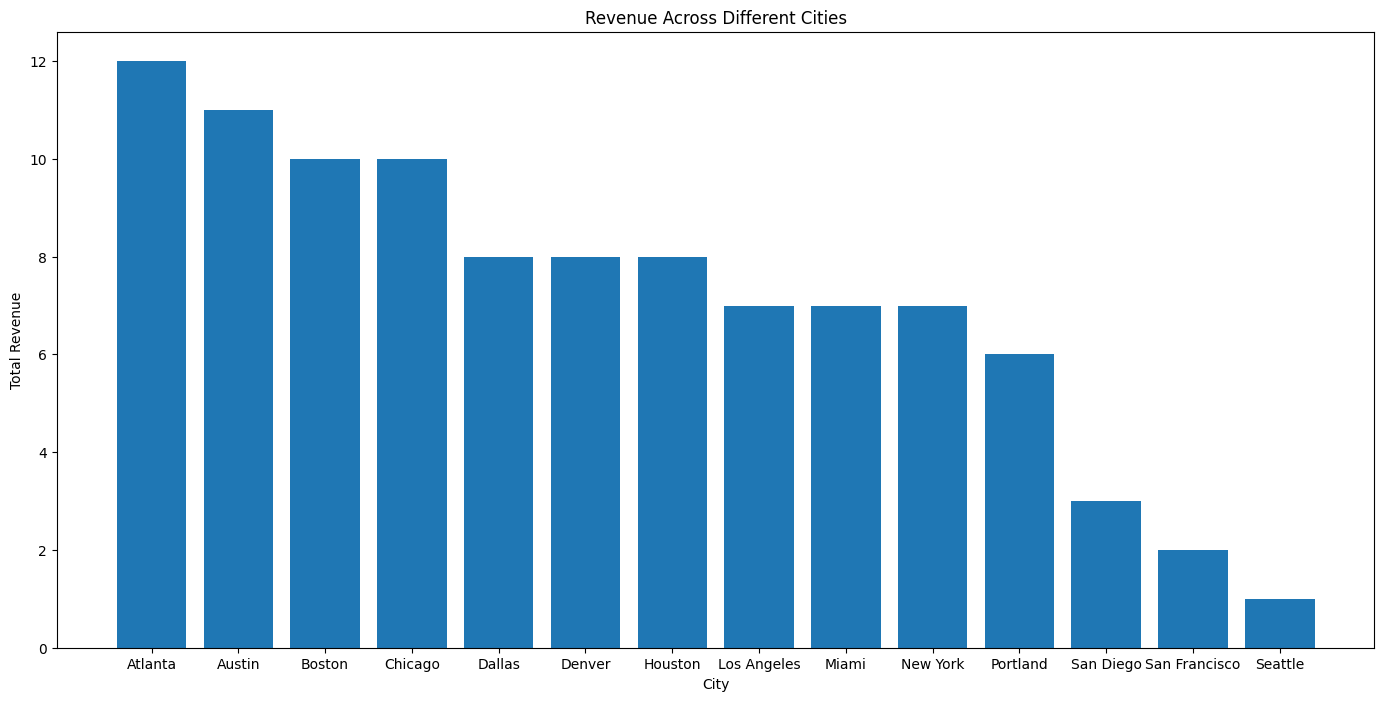

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 8))

plt.bar(total_revenue.index, city_orders.values,)
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.title('Revenue Across Different Cities')
plt.show()

* Customer Behavior analysis


Identify the customer who spent the most money and calculate their total spending.

In [19]:
most_spender = df['CustomerID'].value_counts().nlargest(1)
print('Customer who spent the most money \n',most_spender)
print('Amount they spent ',df.loc[df['CustomerID'] == most_spender.index[0], 'TotalPrice'].sum())

Customer who spent the most money 
 CustomerID
CUST1001    1
Name: count, dtype: Int64
Amount they spent  999.99


find the average order value for all the customers


In [20]:
Avg_order_value = df.groupby('CustomerID')['TotalPrice'].mean()
print('Average order value for all the customers \n',Avg_order_value)


Average order value for all the customers 
 CustomerID
CUST1001     999.99
CUST1002    2499.99
CUST1003      59.98
CUST1004     249.99
CUST1005     799.99
             ...   
CUST1096     699.99
CUST1097    1399.99
CUST1098     348.99
CUST1099      99.99
CUST1100      69.99
Name: TotalPrice, Length: 100, dtype: Float64
